In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

## Pathlib
pathlib 모듈의 기본 아이디어는 파일시스템 경로를 단순한 문자열이 아니라 객체로 다루는 것입니다.

In [0]:
import pathlib

In [0]:
import matplotlib.pyplot as plt

In [0]:
import pandas as pd

In [0]:
import seaborn as sns

In [0]:
try:
  # Colab only:
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
from tensorflow.keras import layers

In [37]:
print(tf.__version__)

2.1.0


# Auto MPG 데이터셋

#### 데이터 구하기

In [0]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [39]:
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [0]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower' 'Weight', 'Acceleration', 'Model Year', 'Origin']

In [0]:
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values="?", comment='\t', sep=" ", skipinitialspace=True)

In [0]:
dataset = raw_dataset.copy()

In [43]:
dataset.tail()

,MPG,Cylinders,Displacement,HorsepowerWeight,Acceleration,Model Year,Origin
27.0,4,140.0,86.0,2790.0,15.6,82,1
44.0,4,97.0,52.0,2130.0,24.6,82,2
32.0,4,135.0,84.0,2295.0,11.6,82,1
28.0,4,120.0,79.0,2625.0,18.6,82,1
31.0,4,119.0,82.0,2720.0,19.4,82,1


#### 데이터 정제하기

In [44]:
dataset.isna().sum()

MPG                 0
Cylinders           0
Displacement        6
HorsepowerWeight    0
Acceleration        0
Model Year          0
Origin              0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [0]:
origin = dataset.pop('Origin')

In [0]:
dataset['USA'] = (origin == 1) * 1.0

In [0]:
dataset['Europe'] = (origin == 2) * 1.0

In [0]:
dataset['Japan'] = (origin == 3) * 1.0

In [50]:
dataset.tail()

,MPG,Cylinders,Displacement,HorsepowerWeight,Acceleration,Model Year,USA,Europe,Japan
27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


## 데이터셋을 훈련 세트와 테스트 세트로 분할하기

In [0]:
train_dataset = dataset.sample(frac=0.8, random_state=0)

In [52]:
train_dataset.index

Float64Index([28.0, 22.3, 12.0, 38.0, 33.8, 19.4, 38.1, 30.0, 20.0, 20.0,
              ...
              24.0, 13.0, 26.8, 23.0, 19.0, 19.8, 16.0, 26.0, 32.0, 28.0],
             dtype='float64', length=314)

In [0]:
test_dataset = dataset.drop(train_dataset.index)

In [54]:
train_dataset

,MPG,Cylinders,Displacement,HorsepowerWeight,Acceleration,Model Year,USA,Europe,Japan
28.0,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
22.3,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
12.0,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
38.0,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
33.8,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
19.8,6,200.0,85.0,2990.0,18.2,79,1.0,0.0,0.0
16.0,8,400.0,180.0,4220.0,11.1,77,1.0,0.0,0.0
26.0,4,108.0,93.0,2391.0,15.5,74,0.0,0.0,1.0
32.0,4,83.0,61.0,2003.0,19.0,74,0.0,0.0,1.0


In [55]:
test_dataset

,MPG,Cylinders,Displacement,HorsepowerWeight,Acceleration,Model Year,USA,Europe,Japan
9.0,8,304.0,193.0,4732.0,18.5,70,1.0,0.0,0.0
22.5,6,232.0,90.0,3085.0,17.6,76,1.0,0.0,0.0
43.1,4,90.0,48.0,1985.0,21.5,78,0.0,1.0,0.0
32.8,4,78.0,52.0,1985.0,19.4,78,0.0,0.0,1.0
20.8,6,200.0,85.0,3070.0,16.7,78,1.0,0.0,0.0
27.5,4,134.0,95.0,2560.0,14.2,78,0.0,0.0,1.0
30.9,4,105.0,75.0,2230.0,14.5,78,1.0,0.0,0.0
31.9,4,89.0,71.0,1925.0,14.0,79,0.0,1.0,0.0
34.1,4,86.0,65.0,1975.0,15.2,79,0.0,0.0,1.0
19.1,6,225.0,90.0,3381.0,18.7,80,1.0,0.0,0.0


## 데이터 조사하기

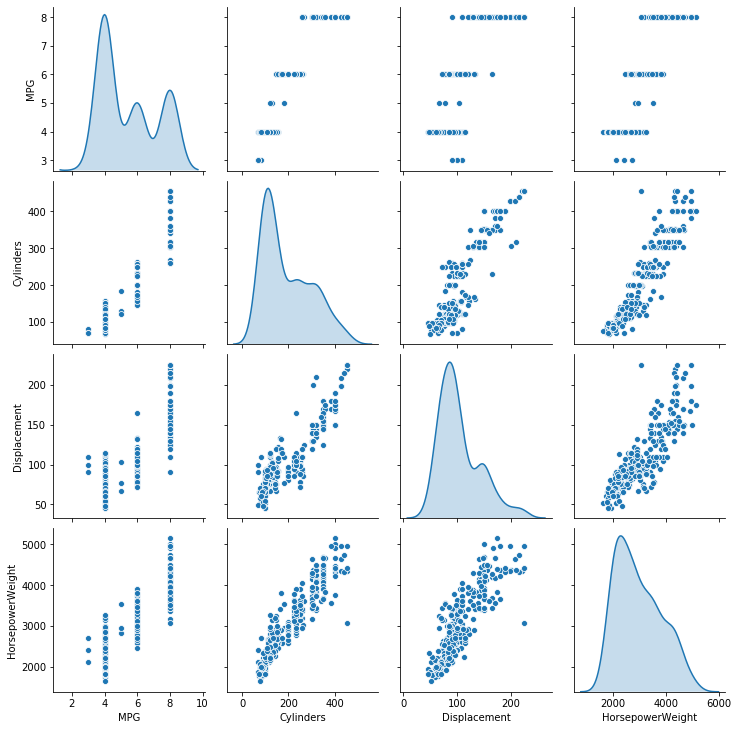

In [58]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "HorsepowerWeight"]], diag_kind="kde")

In [59]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Displacement,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
HorsepowerWeight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


## 특성과 레이블 분리하기

In [0]:
train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

In [61]:
train_labels

28.0    4
22.3    4
12.0    8
38.0    4
33.8    4
       ..
19.8    6
16.0    8
26.0    4
32.0    4
28.0    4
Name: MPG, Length: 314, dtype: int64

In [62]:
test_labels

9.0     8
22.5    6
43.1    4
32.8    4
20.8    6
27.5    4
30.9    4
31.9    4
34.1    4
19.1    6
27.9    4
44.3    4
26.6    4
23.5    6
39.1    4
34.1    4
34.4    4
28.1    4
22.4    6
26.6    8
34.0    4
34.0    4
Name: MPG, dtype: int64

## 데이터 정규화

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [0]:
normed_train_data = norm(train_dataset)

In [65]:
normed_train_data

,Cylinders,Displacement,HorsepowerWeight,Acceleration,Model Year,USA,Europe,Japan
28.0,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
22.3,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
12.0,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
38.0,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
33.8,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852
...,...,...,...,...,...,...,...,...
19.8,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
16.0,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
26.0,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
32.0,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852


In [0]:
normed_test_data = norm(test_dataset)

In [67]:
normed_test_data

,Cylinders,Displacement,HorsepowerWeight,Acceleration,Model Year,USA,Europe,Japan
9.0,1.041693,2.313368,2.063931,1.054328,-1.604642,0.774676,-0.465148,-0.495225
22.5,0.351586,-0.390312,0.112275,0.731659,0.027726,0.774676,-0.465148,-0.495225
43.1,-1.009459,-1.492784,-1.191200,2.129894,0.571849,-1.286751,2.143005,-0.495225
32.8,-1.124477,-1.387787,-1.191200,1.376998,0.571849,-1.286751,-0.465148,2.012852
20.8,0.044872,-0.521559,0.094500,0.408989,0.571849,0.774676,-0.465148,-0.495225
27.5,-0.587727,-0.259066,-0.509838,-0.487316,0.571849,-1.286751,-0.465148,2.012852
30.9,-0.865687,-0.784052,-0.900880,-0.379759,0.571849,0.774676,-0.465148,-0.495225
31.9,-1.019044,-0.889050,-1.262298,-0.559020,0.843910,-1.286751,2.143005,-0.495225
34.1,-1.047798,-1.046546,-1.203049,-0.128794,0.843910,-1.286751,-0.465148,2.012852
19.1,0.284492,-0.390312,0.463028,1.126033,1.115971,0.774676,-0.465148,-0.495225


# 모델

## 모델 만들기

In [0]:
def build_model():
  model = keras.Sequential([
                            layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  
  return model

In [0]:
model = build_model()

## 모델 확인

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [71]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_batch

,Cylinders,Displacement,HorsepowerWeight,Acceleration,Model Year,USA,Europe,Japan
28.0,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
22.3,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
12.0,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
38.0,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
33.8,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852
19.4,0.351586,-0.390312,0.260397,0.588250,0.571849,0.774676,-0.465148,-0.495225
38.1,-1.019044,-1.177792,-1.211344,1.161885,1.115971,-1.286751,-0.465148,2.012852
30.0,-0.472709,-0.994047,0.307796,2.237451,1.115971,-1.286751,2.143005,-0.495225
20.0,0.025702,-0.259066,0.132419,0.337285,-0.516397,0.774676,-0.465148,-0.495225
20.0,-0.942365,-0.442811,-0.842816,1.233589,-0.788458,-1.286751,-0.465148,2.012852


## 모델 훈련

In [73]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 과정을 표시합니다.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2,
    verbose=0, callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [74]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.024540,0.115805,0.024540,0.097824,0.205993,0.097824,995
996,0.032733,0.134197,0.032733,0.119536,0.247327,0.119536,996
997,0.019028,0.088050,0.019028,0.100525,0.212358,0.100525,997
998,0.034244,0.133852,0.034244,0.093776,0.197127,0.093776,998
999,0.014304,0.077634,0.014304,0.094417,0.200948,0.094417,999


In [0]:
import matplotlib.pyplot as plt

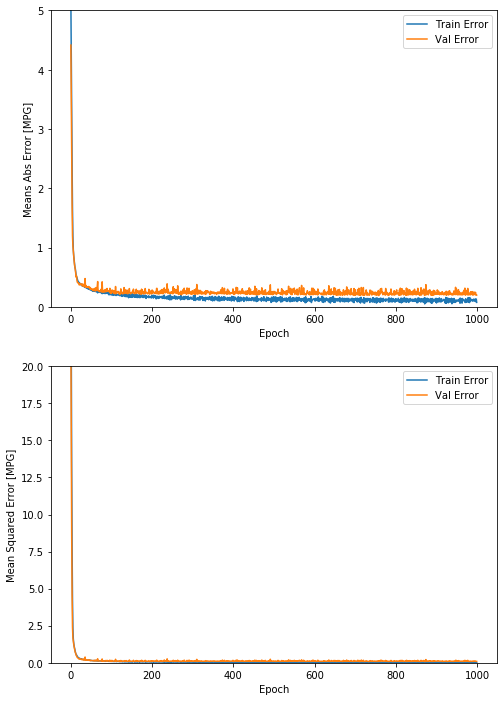

In [76]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8, 12))

  plt.subplot(2, 1, 1)
  plt.xlabel('Epoch')
  plt.ylabel('Means Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
  plt.ylim([0, 5])
  plt.legend()

  plt.subplot(2, 1, 2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [MPG]')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
  plt.ylim([0, 20])
  plt.legend()
  plt.show()

plot_history(history)


...............................................................

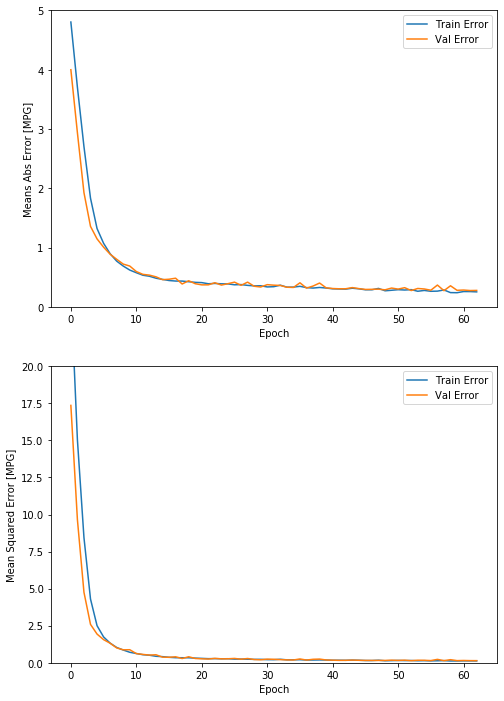

In [77]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [78]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

22/22 - 0s - loss: 0.2649 - mae: 0.3714 - mse: 0.2649
테스트 세트의 평균 절대 오차:  0.37 MPG


# 예측

In [0]:
test_predictons = model.predict(normed_test_data).flatten()

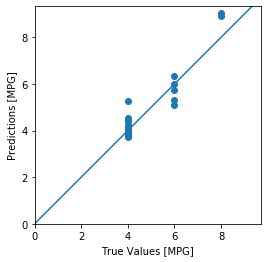

In [87]:
plt.scatter(test_labels, test_predictons)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [0]:
error = test_predictons - test_labels

In [89]:
error

9.0     1.042880
22.5   -0.256308
43.1   -0.068543
32.8   -0.038623
20.8   -0.701241
27.5    0.417985
30.9   -0.192855
31.9    0.036816
34.1   -0.224216
19.1    0.000690
27.9    0.522535
44.3    0.037625
26.6    0.220212
23.5   -0.908364
39.1   -0.197551
34.1   -0.116344
34.4   -0.245094
28.1    1.254407
22.4    0.336366
26.6    0.928872
34.0   -0.292957
34.0    0.131236
Name: MPG, dtype: float64

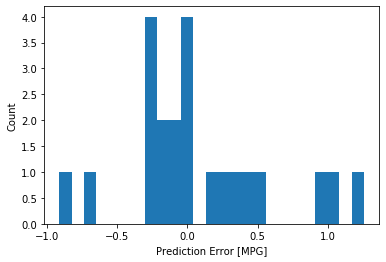

In [91]:
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel("Count")

# 결론
비슷하게 회귀에서 사용되는 평가 지표도 분류와 다릅니다. 

많이 사용하는 회귀 지표는 평균 절댓값 오차(MAE)입니다.
수치 입력 데이터의 특성이 여러 가지 범위를 가질 때 동일한 범위가 되도록 각 특성의 스케일을 독립적으로 조정해야 합니다.

훈련 데이터가 많지 않다면 과대적합을 피하기 위해 은닉층의 개수가 적은 소규모 네트워크를 선택하는 방법이 좋습니다.

조기 종료(Early stopping)은 과대적합을 방지하기 위한 좋은 방법입니다.